# Importing all Libraries


In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import re
import matplotlib.pyplot as plt
import random
import nltk
nltk.download('stopwords')
nltk.download('punkt')
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import json
import plotly.graph_objects as go
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.preprocessing import LabelEncoder
import tensorflow
import numpy as np
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Embedding, LSTM, LayerNormalization, Dense, Dropout
from tensorflow.keras.utils import plot_model
import plotly.graph_objects as go
from sklearn.metrics import accuracy_score, classification_report
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score,confusion_matrix, precision_recall_fscore_support




[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


# Open File Json

In [2]:
with open('intents.json', 'r') as f:
    data = json.load(f)

df = pd.DataFrame(data['intents'])
df

,tag,patterns,responses
0,greeting,"[Hi, Hey, Is anyone there?, Hi there, Hello, H...",[Hello there. Tell me how are you feeling toda...
1,morning,[Good morning],[Good morning. I hope you had a good night's s...
2,afternoon,[Good afternoon],[Good afternoon. How is your day going?]
3,evening,[Good evening],[Good evening. How has your day been?]
4,night,[Good night],"[Good night. Get some proper sleep, Good night..."
...,...,...,...
236,i am feeling isolated at work,"[i am feeling isolated at work, i don't feel c...",[Feeling isolated at work can be difficult. Tr...
237,i am experiencing workplace conflict,"[i am experiencing workplace conflict, i have ...",[Workplace conflict can be stressful. It might...
238,i am having trouble concentrating at work,"[i am having trouble concentrating at work, i ...",[Difficulty concentrating at work can happen t...
239,i feel like i'm not progressing at work,"[i feel like i'm not progressing at work, i am...",[Feeling stuck in your career can be frustrati...


In [3]:
dic = {"tag":[], "patterns":[], "responses":[]}
for i in range(len(df)):
    ptrns = df[df.index == i]['patterns'].values[0]
    rspns = df[df.index == i]['responses'].values[0]
    tag = df[df.index == i]['tag'].values[0]
    for j in range(len(ptrns)):
        dic['tag'].append(tag)
        dic['patterns'].append(ptrns[j])
        dic['responses'].append(rspns)

df = pd.DataFrame.from_dict(dic)
df

,tag,patterns,responses
0,greeting,Hi,[Hello there. Tell me how are you feeling toda...
1,greeting,Hey,[Hello there. Tell me how are you feeling toda...
2,greeting,Is anyone there?,[Hello there. Tell me how are you feeling toda...
3,greeting,Hi there,[Hello there. Tell me how are you feeling toda...
4,greeting,Hello,[Hello there. Tell me how are you feeling toda...
...,...,...,...
644,i am worried about work-life balance,my work is affecting my personal life,[Maintaining a healthy work-life balance is cr...
645,i am worried about work-life balance,i can't separate work and home,[Maintaining a healthy work-life balance is cr...
646,i am worried about work-life balance,work is taking over my personal time,[Maintaining a healthy work-life balance is cr...
647,i am worried about work-life balance,i don't have time for myself because of work,[Maintaining a healthy work-life balance is cr...


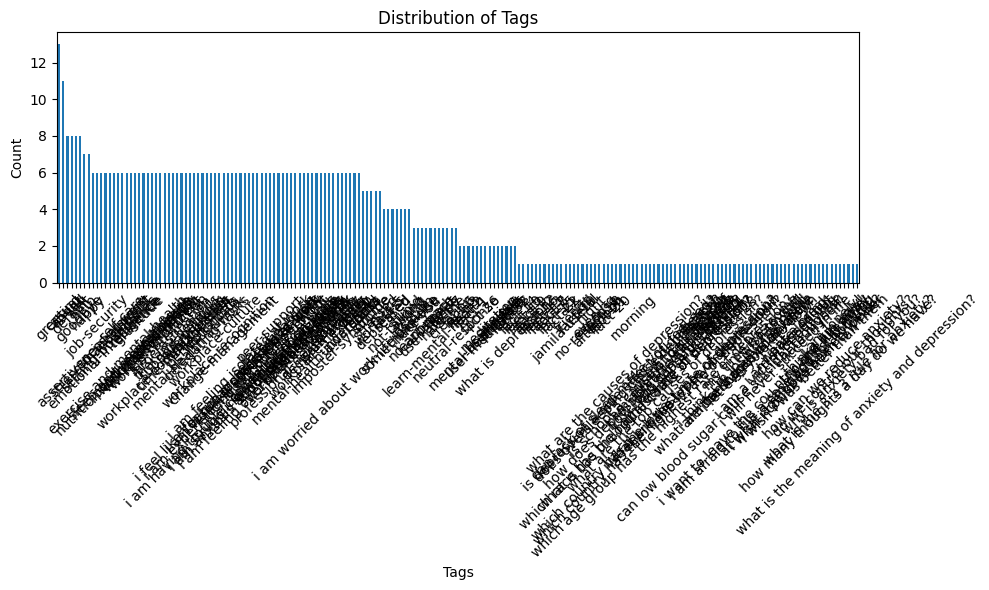

In [4]:
tag_counts = df['tag'].value_counts()

# Memvisualisasikan distribusi menggunakan bar chart
plt.figure(figsize=(10, 6))
tag_counts.plot(kind='bar')
plt.title('Distribution of Tags')
plt.xlabel('Tags')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# data preparation


# Data Processing

In [5]:
df['tag'].unique()

array(['greeting', 'morning', 'afternoon', 'evening', 'night', 'goodbye',
       'thanks', 'no-response', 'neutral-response', 'about',
       'what is depression?', 'skill', 'creation', 'help', 'sad',
       'stressed', 'worthless', 'depressed', 'happy', 'casual', 'anxious',
       'not-talking', 'sleep', 'scared', 'death', 'understand', 'done',
       'suicide', 'hate-you', 'hate-me', 'default', 'jokes', 'repeat',
       'wrong', 'stupid', 'location', 'something-else', 'friends', 'ask',
       'problem', 'no-approach', 'learn-more', 'user-agree', 'meditation',
       'user-meditation', 'jamila-useful', 'user-advice',
       'learn-mental-health', 'mental-health-fact', 'fact-1', 'fact-2',
       'fact-3', 'fact-5', 'fact-6', 'fact-7', 'fact-8', 'fact-9',
       'fact-10', 'fact-11', 'fact-12', 'fact-13', 'fact-14', 'fact-15',
       'fact-16', 'fact-17', 'fact-18', 'fact-19', 'fact-20', 'fact-21',
       'fact-22', 'fact-23', 'fact-24', 'fact-25', 'fact-26', 'fact-27',
       'fact-28'

In [6]:

intent_counts = df['tag'].value_counts()
fig = go.Figure(data=[go.Bar(x=intent_counts.index, y=intent_counts.values)])
fig.update_layout(title='Distribution of Intents', xaxis_title='Intents', yaxis_title='Count')
fig.show()

In [7]:
df['pattern_count'] = df['patterns'].apply(lambda x: len(x))
df['response_count'] = df['responses'].apply(lambda x: len(x))
avg_pattern_count = df.groupby('tag')['pattern_count'].mean()
avg_response_count = df.groupby('tag')['response_count'].mean()

fig = go.Figure()
fig.add_trace(go.Bar(x=avg_pattern_count.index, y=avg_pattern_count.values, name='Average Pattern Count'))
fig.add_trace(go.Bar(x=avg_response_count.index, y=avg_response_count.values, name='Average Response Count'))
fig.update_layout(title='Pattern and Response Analysis', xaxis_title='Intents', yaxis_title='Average Count')
fig.show()

Cleaning Text

In [8]:
def clean_text(text):
    text = text.lower()
    text = re.sub(r'[^a-z\s]', '', text)
    tokens = word_tokenize(text)
    tokens = [word for word in tokens if word not in stopwords.words('english')]
    return ' '.join(tokens)

In [9]:
def clean_text1(text):
    text = text.lower()
    return text

In [10]:
kata = ('No matter what,your parents will always be proud of you and will love you.you will feel much better if you share your feelings with them.')
kata2 = clean_text1(kata)
print('kalimat sebelum di lower: ')
print(kata)
print('kalimat setelah di lower: ')
print(kata2)

kalimat sebelum di lower: 
No matter what,your parents will always be proud of you and will love you.you will feel much better if you share your feelings with them.
kalimat setelah di lower: 
no matter what,your parents will always be proud of you and will love you.you will feel much better if you share your feelings with them.


In [11]:
def clean_text2(text):
    text = re.sub(r'[^a-z\s]', '', text)
    return text

In [12]:
kata3 = clean_text2(kata2)
print('kalimat sebelum di bersihkan: ')
print(kata2)
print('kalimat setelah di bersihkan: ')
print(kata3)

kalimat sebelum di bersihkan: 
no matter what,your parents will always be proud of you and will love you.you will feel much better if you share your feelings with them.
kalimat setelah di bersihkan: 
no matter whatyour parents will always be proud of you and will love youyou will feel much better if you share your feelings with them


In [13]:
def clean_text3(text):
    tokens = word_tokenize(text)
    tokens = [word for word in tokens if word not in stopwords.words('english')]
    return ' '.join(tokens)

In [14]:
kata4 = clean_text3(kata3)
print('Sebelum hapus stopwords: ')
print(kata3)
print('setelah hapus stopwords: ')
print(kata4)

Sebelum hapus stopwords: 
no matter whatyour parents will always be proud of you and will love youyou will feel much better if you share your feelings with them
setelah hapus stopwords: 
matter whatyour parents always proud love youyou feel much better share feelings


Cleaning Pattern

In [15]:
df['cleaned_patterns'] = df['patterns'].apply(clean_text)

In [16]:
print("\nOriginal Patterns:")
for p in df['patterns'][:5]:  # Menampilkan contoh dari pola awal
    print(p)


Original Patterns:
Hi
Hey
Is anyone there?
Hi there
Hello


In [17]:
print("\nCleaned Patterns:")
for cp in df['cleaned_patterns'][:5]:  # Menampilkan contoh dari pola yang telah dibersihkan
    print(cp)


Cleaned Patterns:
hi
hey
anyone
hi
hello


#Contoh

In [18]:
kata = ('No matter what,your parents will always be proud of you and will love you.you will feel much better if you share your feelings with them.')
kata2 = clean_text(kata)
print('kalimat sebelum di clean: ')
print(kata)
print('kalimat setelah di clean: ')
print(kata2)

kalimat sebelum di clean: 
No matter what,your parents will always be proud of you and will love you.you will feel much better if you share your feelings with them.
kalimat setelah di clean: 
matter whatyour parents always proud love youyou feel much better share feelings


In [19]:

tokenizer = Tokenizer(lower=True, split=' ')
tokenizer.fit_on_texts(df['cleaned_patterns'])
tokenizer.get_config()

{'num_words': None,
 'filters': '!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n',
 'lower': True,
 'split': ' ',
 'char_level': False,
 'oov_token': None,
 'document_count': 649,
 'word_counts': '{"hi": 2, "hey": 2, "anyone": 2, "hello": 1, "howdy": 1, "hola": 1, "bonjour": 1, "hay": 1, "sasa": 1, "good": 11, "evening": 2, "afternoon": 2, "morning": 1, "night": 1, "bye": 3, "see": 2, "later": 1, "goodbye": 1, "au": 1, "revoir": 1, "sayonara": 1, "ok": 4, "fare": 1, "thee": 1, "well": 2, "thanks": 2, "thank": 3, "thats": 3, "helpful": 1, "help": 12, "much": 7, "nothing": 7, "really": 3, "tell": 6, "name": 2, "call": 1, "whats": 3, "depression": 22, "created": 2, "made": 1, "could": 2, "give": 1, "hand": 1, "please": 2, "need": 6, "support": 21, "feeling": 7, "lonely": 7, "feel": 34, "sad": 4, "empty": 1, "dont": 16, "stressed": 7, "stuck": 2, "still": 1, "burned": 1, "worthless": 1, "one": 3, "likes": 2, "cant": 14, "anything": 2, "useless": 2, "makes": 1, "sense": 4, "anymore": 3, "take": 3, "de

Conversion Label to Number


In [20]:
ptrn2seq = tokenizer.texts_to_sequences(df['patterns'])
X = pad_sequences(ptrn2seq, padding='post')
print('X shape = ', X.shape)

lbl_enc = LabelEncoder()
y = lbl_enc.fit_transform(df['tag'])
print('y shape = ', y.shape)
print('num of classes = ', len(np.unique(y)))

X shape =  (649, 9)
y shape =  (649,)
num of classes =  190


In [21]:
kata = 'blood sugar suicidal long'

# Tokenizer sebelumnya harus sudah difit pada teks yang relevan
# tokenizer = Tokenizer(num_words=10000)  # misalnya 10000 kata
# tokenizer.fit_on_texts(data)  # 'data' adalah kumpulan teks untuk pelatihan

# Ubah kalimat menjadi urutan angka
kata2 = tokenizer.texts_to_sequences([kata])  # Menjadi list dari kalimat

# Lakukan padding pada urutan
kata2_padded = pad_sequences(kata2, padding='post')

print('Kalimat asli:', kata)
print('Kalimat tokenisasi:', kata2)
print('Kalimat setelah padding:', kata2_padded)

Kalimat asli: blood sugar suicidal long
Kalimat tokenisasi: [[366, 367, 368, 369]]
Kalimat setelah padding: [[366 367 368 369]]


# Train Test Split

In [22]:
from imblearn.over_sampling import SMOTE

In [23]:
from imblearn.over_sampling import RandomOverSampler
from sklearn.metrics import precision_recall_fscore_support
from sklearn.model_selection import train_test_split

# Oversampling using RandomOverSampler
ros = RandomOverSampler(random_state=42)
X_resampled, y_resampled = ros.fit_resample(X, y)

# Check the distribution of y_resampled if needed
from collections import Counter
print(f"Class distribution after oversampling: {Counter(y_resampled)}")

# Split the data into train, validation, and test sets
X_train, X_val, y_train, y_val = train_test_split(X_resampled, y_resampled, test_size=0.1, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.1, random_state=42)

Class distribution after oversampling: Counter({60: 13, 120: 13, 2: 13, 24: 13, 124: 13, 58: 13, 155: 13, 127: 13, 123: 13, 1: 13, 165: 13, 145: 13, 12: 13, 65: 13, 140: 13, 151: 13, 188: 13, 17: 13, 61: 13, 9: 13, 3: 13, 128: 13, 146: 13, 141: 13, 13: 13, 158: 13, 20: 13, 153: 13, 63: 13, 62: 13, 15: 13, 111: 13, 138: 13, 189: 13, 152: 13, 114: 13, 149: 13, 57: 13, 4: 13, 135: 13, 126: 13, 113: 13, 160: 13, 115: 13, 161: 13, 108: 13, 159: 13, 112: 13, 118: 13, 26: 13, 37: 13, 48: 13, 52: 13, 53: 13, 54: 13, 55: 13, 56: 13, 27: 13, 28: 13, 29: 13, 30: 13, 31: 13, 32: 13, 33: 13, 34: 13, 35: 13, 36: 13, 38: 13, 39: 13, 40: 13, 41: 13, 42: 13, 43: 13, 44: 13, 45: 13, 46: 13, 47: 13, 49: 13, 50: 13, 51: 13, 90: 13, 0: 13, 80: 13, 78: 13, 99: 13, 71: 13, 162: 13, 164: 13, 169: 13, 170: 13, 171: 13, 107: 13, 167: 13, 67: 13, 172: 13, 168: 13, 19: 13, 7: 13, 106: 13, 8: 13, 68: 13, 163: 13, 6: 13, 173: 13, 166: 13, 18: 13, 69: 13, 66: 13, 82: 13, 125: 13, 96: 13, 79: 13, 103: 13, 94: 13, 102

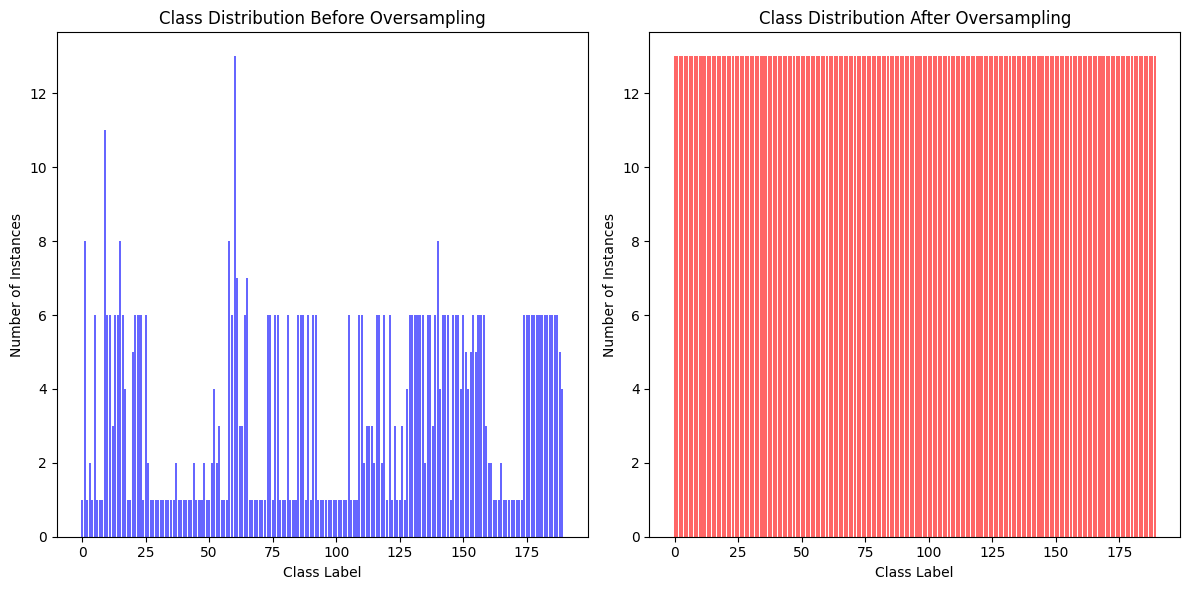

In [24]:
# Menghitung distribusi kelas sebelum oversampling
class_distribution_before = Counter(y)

# Menghitung distribusi kelas setelah oversampling
class_distribution_after = Counter(y_resampled)

# Mengambil label kelas sebagai kategori
labels = list(class_distribution_before.keys())
before_counts = [class_distribution_before[label] for label in labels]
after_counts = [class_distribution_after[label] for label in labels]

# Plotting
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

ax1.bar(labels, before_counts, color='b', alpha=0.6)
ax1.set_title('Class Distribution Before Oversampling')
ax1.set_xlabel('Class Label')
ax1.set_ylabel('Number of Instances')

ax2.bar(labels, after_counts, color='r', alpha=0.6)
ax2.set_title('Class Distribution After Oversampling')
ax2.set_xlabel('Class Label')
ax2.set_ylabel('Number of Instances')

plt.tight_layout()
plt.show()


In [25]:
vacab_size = len(tokenizer.word_index)
print('number of unique words = ', vacab_size)

number of unique words =  447


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ (None, 9, 50)               │          22,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm (LSTM)                          │ (None, 9, 80)               │          41,920 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ layer_normalization                  │ (None, 9, 80)               │             160 │
│ (LayerNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 80)                  │          51,520 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ layer_normalization_1                │ (None, 80)                  │             160 │
│ (LayerNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │          20,736 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ layer_normalization_2                │ (None, 256)                 │             512 │
│ (LayerNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 256)                 │          65,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ layer_normalization_3                │ (None, 256)                 │             512 │
│ (LayerNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 190)                 │          48,830 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 252,542 (986.49 KB)

 Trainable params: 252,542 (986.49 KB)

 Non-trainable params: 0 (0.00 B)

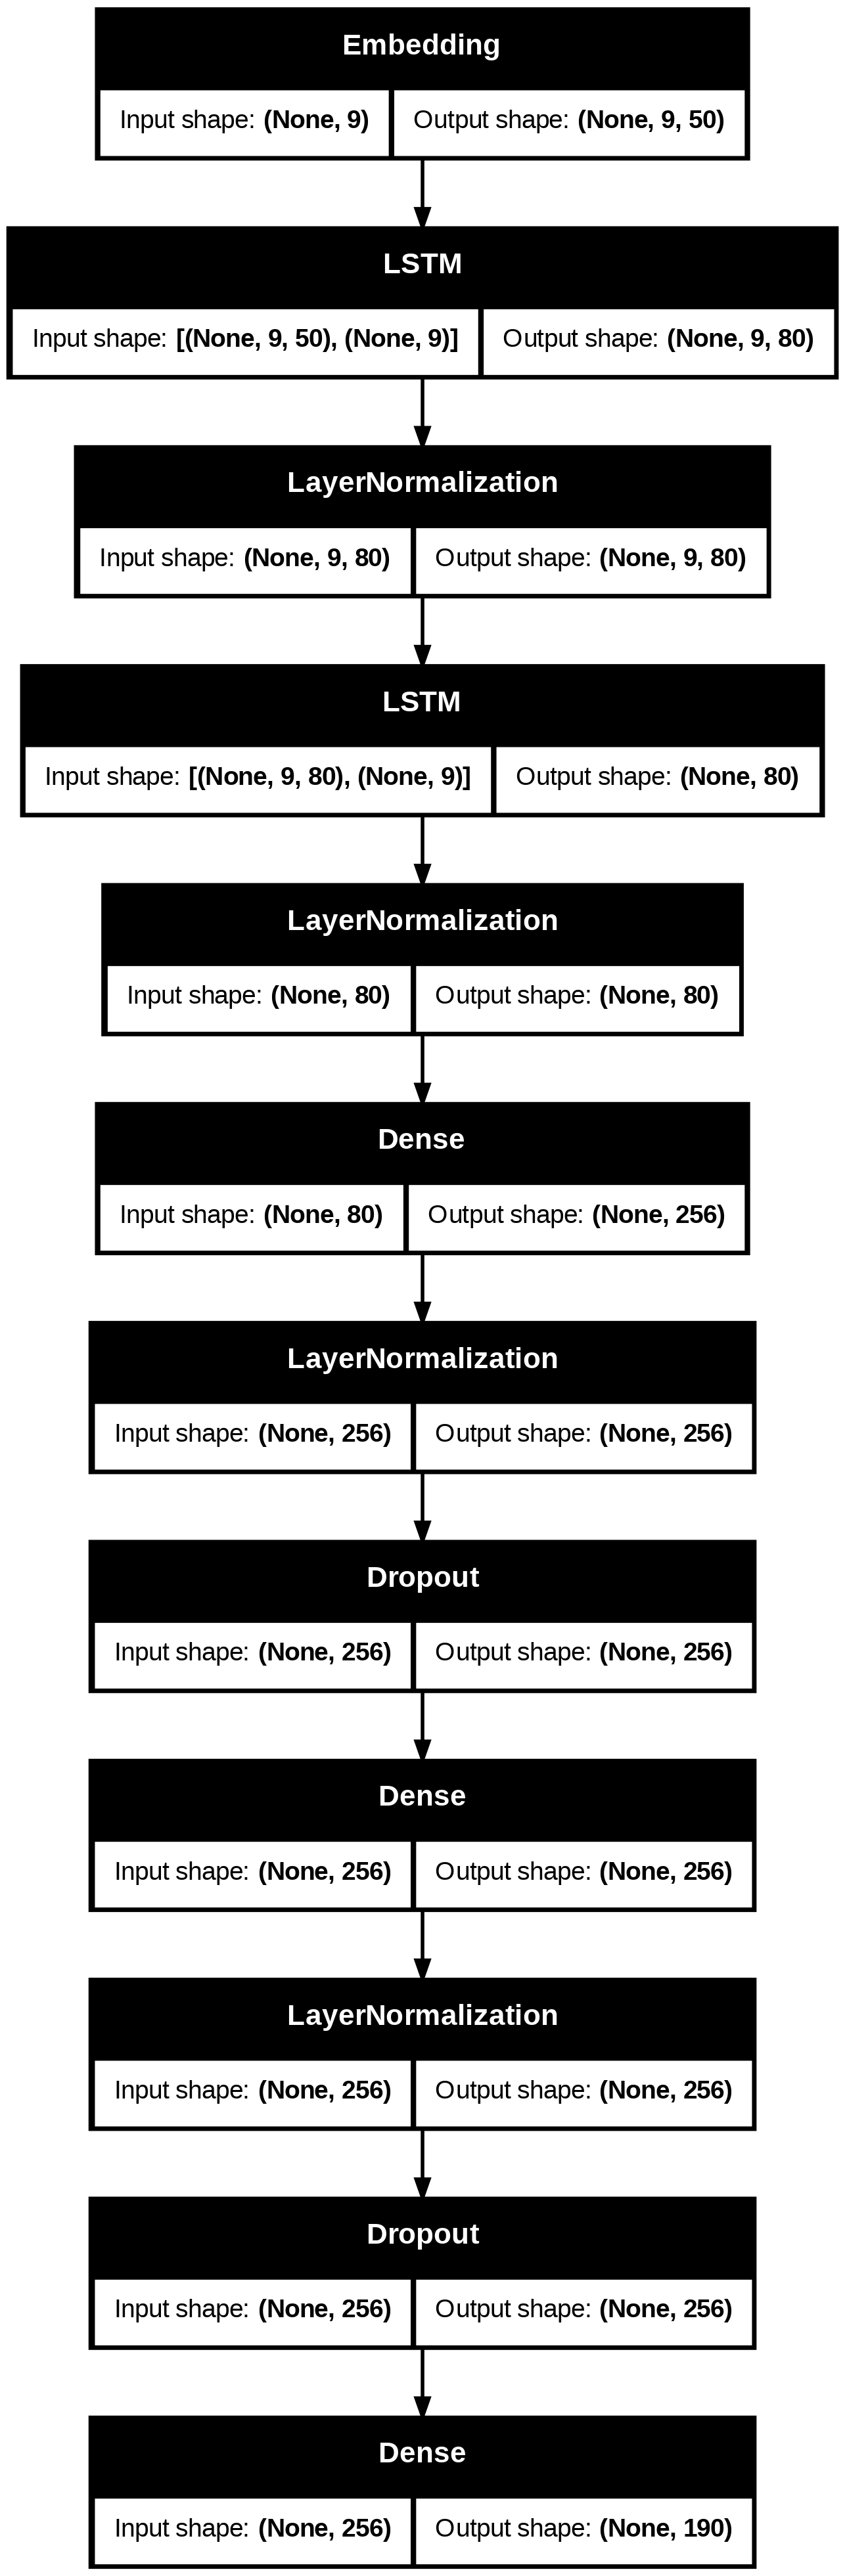

In [26]:
from tensorflow.keras.optimizers import RMSprop

# Model Definition
model = Sequential()
model.add(Input(shape=(X.shape[1],)))  # Input layer, X.shape[1] adalah panjang input sequence
model.add(Embedding(input_dim=vacab_size+1, output_dim=50, mask_zero=True))  # Embedding layer dengan dimensi 50
model.add(LSTM(80, return_sequences=True))  # LSTM layer dengan 80 unit, return sequences=True untuk layer berikutnya
model.add(LayerNormalization())  # Normalisasi lapisan
model.add(LSTM(80))  # LSTM layer dengan 80 unit
model.add(LayerNormalization())  # Normalisasi lapisan
model.add(Dense(256, activation="relu"))  # Dense layer dengan 256 unit dan ReLU activation
model.add(LayerNormalization())  # Normalisasi lapisan
model.add(Dropout(0.2))  # Dropout layer dengan rate 0.2
model.add(Dense(256, activation="relu"))  # Dense layer dengan 256 unit dan ReLU activation
model.add(LayerNormalization())  # Normalisasi lapisan
model.add(Dropout(0.2))  # Dropout layer dengan rate 0.2
model.add(Dense(len(np.unique(y)), activation="softmax"))  # Output layer dengan softmax activation


model.compile(optimizer=RMSprop(), loss="sparse_categorical_crossentropy", metrics=['accuracy'])


model.summary()
plot_model(model, show_shapes=True)

In [27]:
# Fungsi untuk menghitung precision, recall, dan f1-score
def calculate_metrics(y_true, y_pred):
    precision, recall, f1, _ = precision_recall_fscore_support(y_true, y_pred, average='weighted', zero_division=1)
    return precision, recall, f1

# Callback untuk mencetak metrik setiap epoch
class MetricsCallback(tensorflow.keras.callbacks.Callback):
    def __init__(self, X_train, y_train, X_val, y_val):
        super(MetricsCallback, self).__init__()
        self.X_train = X_train
        self.y_train = y_train
        self.X_val = X_val
        self.y_val = y_val

    def on_epoch_end(self, epoch, logs=None):
        # Prediksi untuk data pelatihan dan validasi
        train_pred = np.argmax(self.model.predict(self.X_train), axis=-1)
        val_pred = np.argmax(self.model.predict(self.X_val), axis=-1)

        # Menghitung metrik untuk data pelatihan dan validasi
        train_precision, train_recall, train_f1 = calculate_metrics(self.y_train, train_pred)
        val_precision, val_recall, val_f1 = calculate_metrics(self.y_val, val_pred)

        # Mendapatkan metrik loss dan accuracy dari logs
        train_loss = logs.get('loss')
        train_acc = logs.get('accuracy')
        val_loss = logs.get('val_loss')
        val_acc = logs.get('val_accuracy')

        # Mencetak metrik
        print(f'\nEpoch {epoch + 1} metrics:')
        print(f'Train Loss: {train_loss:.4f} - Train Acc: {train_acc:.4f} - Train F1: {train_f1:.4f} - Train Rec: {train_recall:.4f} - Train Pre: {train_precision:.4f}')
        print(f'Valid Loss: {val_loss:.4f} - Valid Acc: {val_acc:.4f} - Valid F1: {val_f1:.4f} - Valid Rec: {val_recall:.4f} - Valid Pre: {val_precision:.4f}')

# Pastikan X_train, y_train, X_val, dan y_val sudah didefinisikan sebelumnya
metrics_callback = MetricsCallback(X_train, y_train, X_val, y_val)
early_stopping = tensorflow.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=3)

In [28]:
pip install keras-tuner


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 3.2 MB/s eta 0:00:00


In [29]:
import kerastuner as kt

def build_model(hp):
    model = Sequential()
    model.add(Input(shape=(X.shape[1],)))
    model.add(Embedding(input_dim=vacab_size+1, output_dim=hp.Int('embedding_dim', min_value=50, max_value=200, step=50), mask_zero=True))
    for i in range(hp.Int('num_layers', 1, 3)):
        model.add(LSTM(hp.Int('units', min_value=16, max_value=128, step=16), return_sequences=True))
        model.add(LayerNormalization())
    model.add(LSTM(hp.Int('units', min_value=16, max_value=128, step=16)))
    model.add(LayerNormalization())
    model.add(Dense(256, activation="relu"))
    model.add(LayerNormalization())
    model.add(Dropout(hp.Float('dropout_rate', min_value=0.2, max_value=0.5, step=0.1)))
    model.add(Dense(256, activation="relu"))
    model.add(LayerNormalization())
    model.add(Dropout(hp.Float('dropout_rate', min_value=0.2, max_value=0.5, step=0.1)))
    model.add(Dense(len(np.unique(y)), activation="softmax"))
    model.compile(optimizer=hp.Choice('optimizer', values=['adam', 'rmsprop']), loss="sparse_categorical_crossentropy", metrics=['accuracy'])
    return model

tuner = kt.Hyperband(build_model, objective='val_accuracy', max_epochs=10, factor=3, directory='my_dir', project_name='intro_to_kt')
tuner.search(X_train, y_train, epochs=50, validation_data=(X_val, y_val))
tuner.results_summary()


<ipython-input-29-e6ffe6250044>:1: DeprecationWarning:

`import kerastuner` is deprecated, please use `import keras_tuner`.




Search: Running Trial #1

Value             |Best Value So Far |Hyperparameter
200               |200               |embedding_dim
2                 |2                 |num_layers
16                |16                |units
0.4               |0.4               |dropout_rate
rmsprop           |rmsprop           |optimizer
2                 |2                 |tuner/epochs
0                 |0                 |tuner/initial_epoch
2                 |2                 |tuner/bracket
0                 |0                 |tuner/round

Epoch 1/2


Exception ignored in: <function _xla_gc_callback at 0x7dd1867b8af0>
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/jax/_src/lib/__init__.py", line 98, in _xla_gc_callback
    def _xla_gc_callback(*args):
KeyboardInterrupt: 
ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-29-e6ffe6250044>", line 23, in <cell line: 23>
    tuner.search(X_train, y_train, epochs=50, validation_data=(X_val, y_val))
  File "/usr/local/lib/python3.10/dist-packages/keras_tuner/src/engine/base_tuner.py", line 234, in search
    self._try_run_and_update_trial(trial, *fit_args, **fit_kwargs)
  File "/usr/local/lib/python3.10/dist-packages/keras_tuner/src/engine/base_tuner.py", line 274, in _try_run_and_update_trial
    self._run_and_update_trial(trial, *fit_args, **fit_kwargs)
  File "/usr/local/lib/python3.10/dist-packages/keras_tuner/src/engine/base_tuner.py", line 239, in _run_and_update_trial
    results = self.run_trial(trial, *fit_args, **fit_kwargs)
  File "/usr/local/lib/python3.10/dist-packages/keras_tuner/src/tuners/hyperband.py", line 427, in run_trial
  

TypeError: object of type 'NoneType' has no len()

In [ ]:
tuner.results_summary()


In [30]:
model_history = model.fit(x=X_train,
                          y=y_train,
                          batch_size=10,
                          callbacks=[early_stopping, metrics_callback],
                          validation_data=(X_val, y_val),
                          epochs=50)
model.save('model.h5')

Epoch 1/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step

Epoch 1 metrics:
Train Loss: 3.0645 - Train Acc: 0.4705 - Train F1: 0.8493 - Train Rec: 0.8675 - Train Pre: 0.9173
Valid Loss: 1.1118 - Valid Acc: 0.8259 - Valid F1: 0.8025 - Valid Rec: 0.8259 - Valid Pre: 0.9295
200/200 ━━━━━━━━━━━━━━━━━━━━ 27s 74ms/step - accuracy: 0.2734 - loss: 4.1888 - val_accuracy: 0.8259 - val_loss: 1.1118
Epoch 2/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step

Epoch 2 metrics:
Train Loss: 0.9383 - Train Acc: 0.8385 - Train F1: 0.9053 - Train Rec: 0.9150 - Train Pre: 0.9499
Valid Loss: 0.5879 - Valid Acc: 0.8785 - Valid F1: 0.8538 - Valid Rec: 0.8785 - Valid Pre: 0.9558
200/200 ━━━━━━━━━━━━━━━━━━━━ 15s 45ms/step - accuracy: 0.8279 - loss: 1.0536 - val_accuracy: 0.8785 - val_loss: 0.5879
Epoch 3/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 

Epoch 3 metrics:
Train Loss: 0.4707 - Train Acc: 0.9165 - Train F1:

In [31]:
from sklearn.svm import SVC
from sklearn.metrics import precision_recall_fscore_support

# Model SVM
svm_model = SVC(kernel='linear', probability=True)  # probability=True untuk mendapatkan probabilitas prediksi
svm_model.fit(X_train, y_train)

# Prediksi pada data training dan validasi
train_pred_svm = svm_model.predict(X_train)
val_pred_svm = svm_model.predict(X_val)

# Menghitung metrik untuk data pelatihan dan validasi
train_precision_svm, train_recall_svm, train_f1_svm = calculate_metrics(y_train, train_pred_svm)
val_precision_svm, val_recall_svm, val_f1_svm = calculate_metrics(y_val, val_pred_svm)

# Mencetak metrik
print(f'SVM Model:')
print(f'Train F1: {train_f1_svm:.4f} - Train Rec: {train_recall_svm:.4f} - Train Pre: {train_precision_svm:.4f}')
print(f'Valid F1: {val_f1_svm:.4f} - Valid Rec: {val_recall_svm:.4f} - Valid Pre: {val_precision_svm:.4f}')


SVM Model:
Train F1: 0.7557 - Train Rec: 0.7525 - Train Pre: 0.8590
Valid F1: 0.7392 - Valid Rec: 0.6883 - Valid Pre: 0.8823


In [32]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_recall_fscore_support

# Model RandomForest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Prediksi pada data training dan validasi
train_pred_rf = rf_model.predict(X_train)
val_pred_rf = rf_model.predict(X_val)
test_pred_rf = rf_model.predict(X_test)

# Menghitung metrik untuk data pelatihan dan validasi
train_precision_rf, train_recall_rf, train_f1_rf, _ = precision_recall_fscore_support(y_train, train_pred_rf, average='weighted')
val_precision_rf, val_recall_rf, val_f1_rf, _ = precision_recall_fscore_support(y_val, val_pred_rf, average='weighted')
test_precision_rf, test_recall_rf, test_f1_rf, _ = precision_recall_fscore_support(y_test, test_pred_rf, average='weighted')


# Mencetak metrik
print(f'RandomForest Model:')
print(f'Train F1: {train_f1_rf:.4f} - Train Rec: {train_recall_rf:.4f} - Train Pre: {train_precision_rf:.4f}')
print(f'Valid F1: {val_f1_rf:.4f} - Valid Rec: {val_recall_rf:.4f} - Valid Pre: {val_precision_rf:.4f}')
print(f'Test F1: {test_f1_rf:.4f} - Test Rec: {test_recall_rf:.4f} - Test Pre: {test_precision_rf:.4f}')  # Mencetak metrik untuk data test


RandomForest Model:
Train F1: 0.9584 - Train Rec: 0.9605 - Train Pre: 0.9688
Valid F1: 0.9293 - Valid Rec: 0.9312 - Valid Pre: 0.9464
Test F1: 0.8885 - Test Rec: 0.8969 - Test Pre: 0.9036


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning:

Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter

In [33]:
def plot_svm_architecture():
    plt.figure(figsize=(8, 6))
    plt.title("Arsitektur Model SVM")
    plt.text(0.5, 0.8, "Input Data", ha='center', va='center', bbox=dict(facecolor='blue', alpha=0.5))
    plt.text(0.5, 0.6, "Kernel (Linear)", ha='center', va='center', bbox=dict(facecolor='green', alpha=0.5))
    plt.text(0.5, 0.4, "Hyperplane", ha='center', va='center', bbox=dict(facecolor='orange', alpha=0.5))
    plt.text(0.5, 0.2, "Output Class", ha='center', va='center', bbox=dict(facecolor='red', alpha=0.5))
    plt.axis('off')
    plt.show()

def plot_rf_architecture():
    plt.figure(figsize=(8, 6))
    plt.title("Arsitektur Model Random Forest")
    plt.text(0.5, 0.8, "Input Data", ha='center', va='center', bbox=dict(facecolor='blue', alpha=0.5))
    plt.text(0.3, 0.6, "Tree 1", ha='center', va='center', bbox=dict(facecolor='green', alpha=0.5))
    plt.text(0.5, 0.6, "Tree 2", ha='center', va='center', bbox=dict(facecolor='green', alpha=0.5))
    plt.text(0.7, 0.6, "Tree 3", ha='center', va='center', bbox=dict(facecolor='green', alpha=0.5))
    plt.text(0.5, 0.4, "Voting", ha='center', va='center', bbox=dict(facecolor='orange', alpha=0.5))
    plt.text(0.5, 0.2, "Output Class", ha='center', va='center', bbox=dict(facecolor='red', alpha=0.5))
    plt.axis('off')
    plt.show()

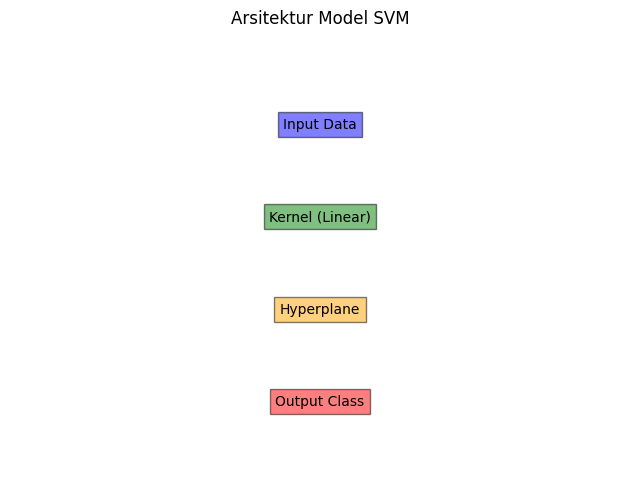

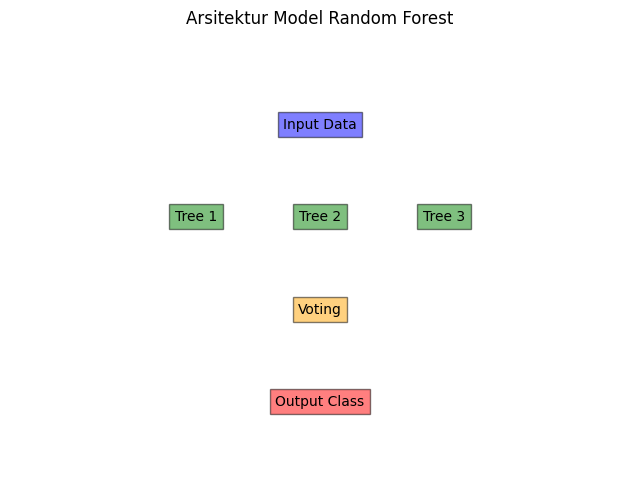

In [34]:
# Panggil fungsi untuk menampilkan diagram
plot_svm_architecture()
plot_rf_architecture()